**importing modules**

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

**loading dataset**

In [96]:
train_df = pd.read_csv('/content/train (1).csv')
test_df = pd.read_csv('/content/test (1).csv')

**ADDING A NEW FEATURE IN THE ABOVE CODE AS HouseAge**

In [97]:
current_year = 2024
train_df['HouseAge'] = current_year - train_df['YearBuilt']
test_df['HouseAge'] = current_year - test_df['YearBuilt']

In [98]:
# Calculate TotalBathrooms
train_df['TotalBathrooms'] = train_df['FullBath'] + train_df['HalfBath'] + train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
test_df['TotalBathrooms'] = test_df['FullBath'] + test_df['HalfBath'] + test_df['BsmtFullBath'] + test_df['BsmtHalfBath']


**DESCRIBING ABOUT THE DATA**

In [99]:
train_df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,TotalBathrooms
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,21,4
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,48,3
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,23,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,109,2
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,24,4
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,Shed,700,10,2009,WD,Normal,143000,31,3
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Normal,307000,20,3


In [100]:
test_df.head(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalBathrooms
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,63,1.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,66,2.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,27,3.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,26,3.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,32,2.0
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,31,3.0
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,NaN,GdPrv,Shed,500,3,2010,WD,Normal,32,3.0


In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   object 
 3   LotFrontage     1201 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   object 
 6   Alley           91 non-null     object 
 7   LotShape        1460 non-null   object 
 8   LandContour     1460 non-null   object 
 9   Utilities       1460 non-null   object 
 10  LotConfig       1460 non-null   object 
 11  LandSlope       1460 non-null   object 
 12  Neighborhood    1460 non-null   object 
 13  Condition1      1460 non-null   object 
 14  Condition2      1460 non-null   object 
 15  BldgType        1460 non-null   object 
 16  HouseStyle      1460 non-null   object 
 17  OverallQual     1460 non-null   i

In [102]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1459 non-null   int64  
 1   MSSubClass      1459 non-null   int64  
 2   MSZoning        1455 non-null   object 
 3   LotFrontage     1232 non-null   float64
 4   LotArea         1459 non-null   int64  
 5   Street          1459 non-null   object 
 6   Alley           107 non-null    object 
 7   LotShape        1459 non-null   object 
 8   LandContour     1459 non-null   object 
 9   Utilities       1457 non-null   object 
 10  LotConfig       1459 non-null   object 
 11  LandSlope       1459 non-null   object 
 12  Neighborhood    1459 non-null   object 
 13  Condition1      1459 non-null   object 
 14  Condition2      1459 non-null   object 
 15  BldgType        1459 non-null   object 
 16  HouseStyle      1459 non-null   object 
 17  OverallQual     1459 non-null   i

**REMOVE UNECESSARY VARIABLES** from the train and test dataset

In [103]:
train_df.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)
test_df.drop(columns = [ 'MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'MasVnrType', 'Alley', 'LotFrontage'], axis = 1, inplace = True)

In [104]:
remaining_attributes =  train_df.columns.tolist()
print("Remaining attributes after dropping some attributes:")
for attribute in remaining_attributes:
    print(attribute)

Remaining attributes after dropping some attributes:
Id
MSSubClass
MSZoning
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
HouseAge
TotalBathrooms


In [105]:
remaining_attributes =  test_df.columns.tolist()
print("Remaining attributes after dropping some attributes:")
for attribute in remaining_attributes:
    print(attribute)

Remaining attributes after dropping some attributes:
Id
MSSubClass
MSZoning
LotArea
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
HouseAge
TotalBathrooms


**CHECK THE MISSING VALUES**

In [106]:
train_df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotArea           0
Street            0
                 ..
SaleType          0
SaleCondition     0
SalePrice         0
HouseAge          0
TotalBathrooms    0
Length: 76, dtype: int64

**IMPORTANT FEATURES**

In [107]:
important_features = ['YearBuilt','LotArea','OverallQual','OverallCond','GrLivArea','1stFlrSF','2ndFlrSF','BedroomAbvGr','OpenPorchSF','PoolArea','SalePrice']
train_df[important_features].describe()

,YearBuilt,LotArea,OverallQual,OverallCond,GrLivArea,1stFlrSF,2ndFlrSF,BedroomAbvGr,OpenPorchSF,PoolArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,10516.828082,6.099315,5.575342,1515.463699,1162.626712,346.992466,2.866438,46.660274,2.758904,180921.195890
std,30.202904,9981.264932,1.382997,1.112799,525.480383,386.587738,436.528436,0.815778,66.256028,40.177307,79442.502883
min,1872.000000,1300.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,1954.000000,7553.500000,5.000000,5.000000,1129.500000,882.000000,0.000000,2.000000,0.000000,0.000000,129975.000000
50%,1973.000000,9478.500000,6.000000,5.000000,1464.000000,1087.000000,0.000000,3.000000,25.000000,0.000000,163000.000000
75%,2000.000000,11601.500000,7.000000,6.000000,1776.750000,1391.250000,728.000000,3.000000,68.000000,0.000000,214000.000000
max,2010.000000,215245.000000,10.000000,9.000000,5642.000000,4692.000000,2065.000000,8.000000,547.000000,738.000000,755000.000000


**VISUALIZE**

HISTOGRAMS OF TRAIN DATA
(VALUE VS FREQUENCY)

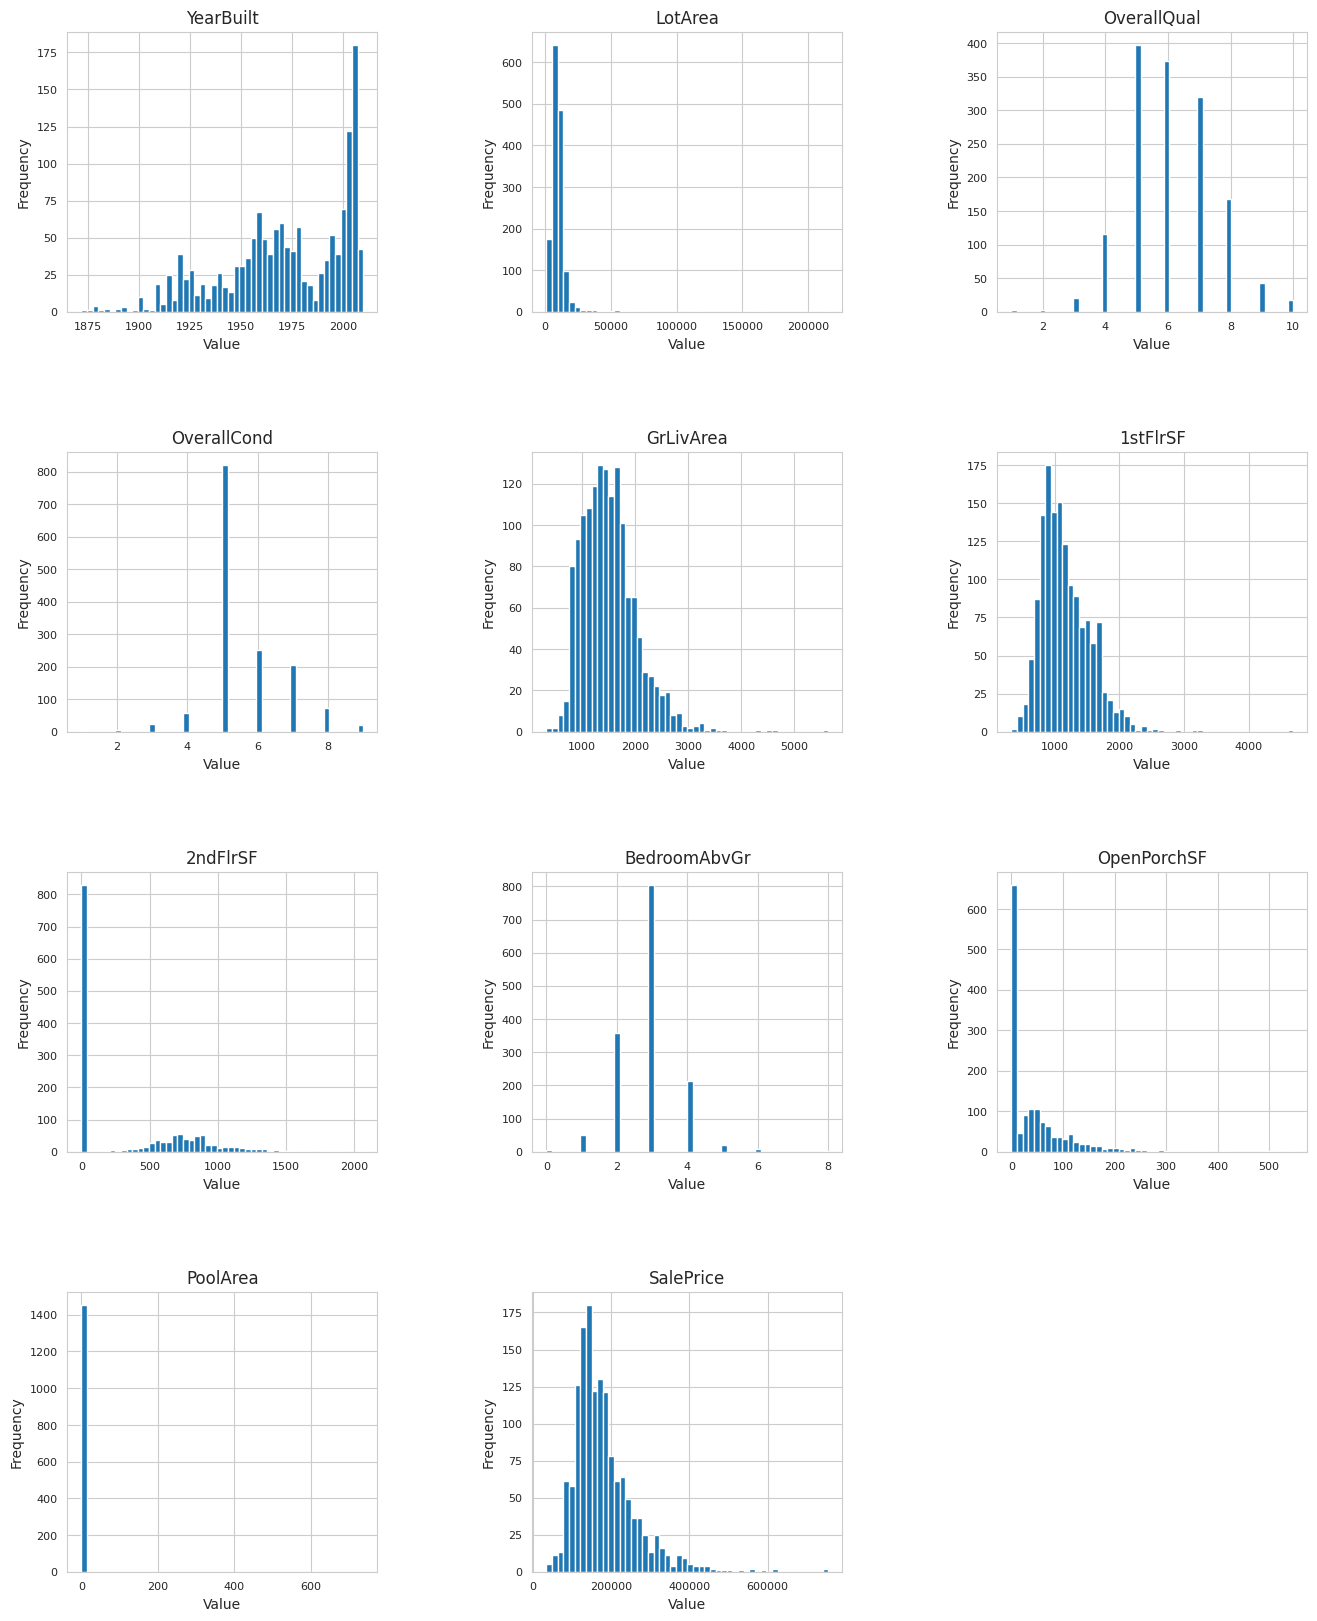

In [108]:
import matplotlib.pyplot as plt

numerical_features = train_df[important_features].select_dtypes(exclude=['object'])
histograms = numerical_features.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Iterate over each subplot and add x and y labels
for ax in histograms.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust the space between subplots
plt.show()


**Distribution of Sale Prices**

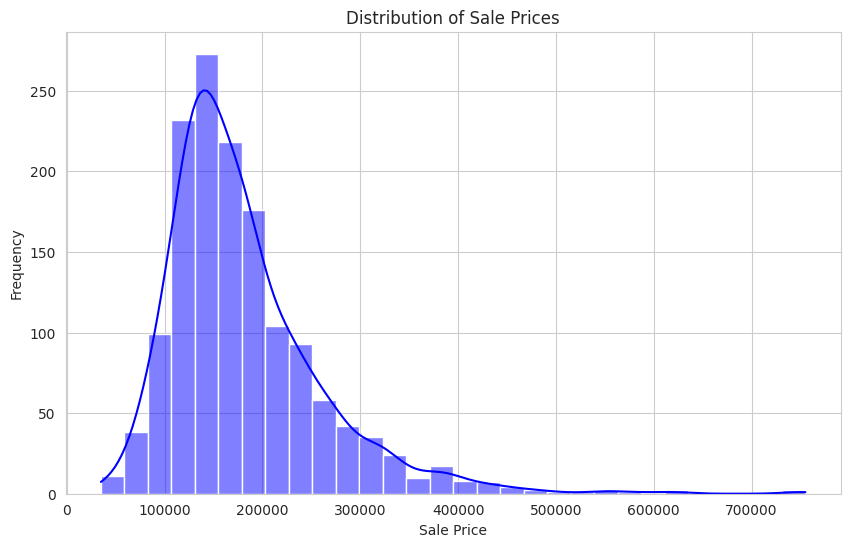

In [109]:
# Set the style of the plots
sns.set_style("whitegrid")

# Distribution of Sale Prices
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

**Boxplot of Sale Prices by Overall Quality**

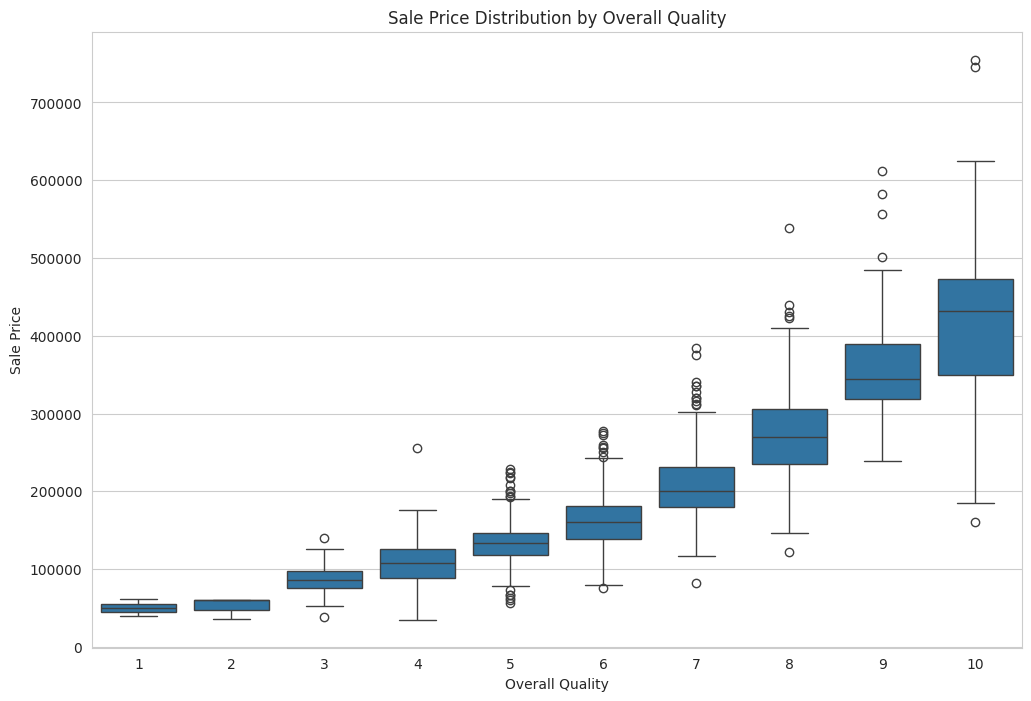

In [110]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price Distribution by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

**PREPROCESSING**

We want to handle missing values, encode categorical variables, and scale numerical features:

In [111]:
# Separate target variable and predictors
X_train = train_df[important_features].drop(['SalePrice'], axis=1)
y_train = np.log(train_df['SalePrice'])  # Transform target variable with logarithm
X_test = test_df.drop(['Id'], axis=1)

# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
#numerical_transformer: This pipeline is designed to preprocess numerical data. It consists of two steps:
#SimpleImputer: This step replaces missing values in numerical columns with the mean of the column.
#StandardScaler: This step standardizes the numerical features by removing the mean and scaling to unit variance.
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
#categorical_transformer: This pipeline is designed to preprocess categorical data. It also consists of two steps:
#SimpleImputer: This step replaces missing values in categorical columns with the most frequent value of the column.
#OneHotEncoder: This step converts categorical variables into binary vectors using one-hot encoding. handle_unknown='ignore' is used to handle unknown categories in the test data during encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

**MODELS**

IMPORTING THE MODELS

In [112]:
# Linear Regression
lr_model = LinearRegression()

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)


In [113]:
# Pipelines for each model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', lr_model)])


In [114]:

# Train the models
rf_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['YearBuilt', 'LotArea', 'OverallQual', 'OverallCond', 'GrLivArea',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'OpenPorchSF', 'PoolArea'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LinearRegression())])

In [115]:
# Predictions in log scale train
predictions_lr_log_scale = lr_pipeline.predict(X_train)
predictions_rf_log_scale = rf_pipeline.predict(X_train)


In [116]:
# Convert predictions back from log scale
predictions_lr = np.exp(predictions_lr_log_scale)
predictions_rf = np.exp(predictions_rf_log_scale)

In [117]:
import math
# Calculate MSE for training set
mse_lr_train = mean_squared_error(train_df['SalePrice'], predictions_lr)
mse_rf_train = mean_squared_error(train_df['SalePrice'], predictions_rf)
print("Root Mean Squared Error (MSE) for Linear Regression on training set:",math.sqrt(mse_lr_train))
print("Root Mean Squared Error (MSE) for random forest on training set:",math.sqrt(mse_rf_train))
print("r2_score for linear regression:",r2_score(train_df['SalePrice'], predictions_lr))
print("r2_score for random forest",r2_score(train_df['SalePrice'], predictions_rf))

print("Mean Squared Error (MSE) for Linear Regression on training set:", mse_lr_train)
print("Mean Squared Error (MSE) for Random Forest on training set:", mse_rf_train)


Root Mean Squared Error (MSE) for Linear Regression on training set: 47806.78361527312
Root Mean Squared Error (MSE) for random forest on training set: 11577.134189560033
r2_score for linear regression: 0.6376145277888738
r2_score for random forest 0.9787482909520018
Mean Squared Error (MSE) for Linear Regression on training set: 2285488559.6375465
Mean Squared Error (MSE) for Random Forest on training set: 134030036.04307982


In [118]:
# Predictions for test set
predictions_lr_test = np.exp(lr_pipeline.predict(X_test))
predictions_rf_test = np.exp(rf_pipeline.predict(X_test))


In [119]:
# Create DataFrames for the predictions
predictions_lr_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions_lr_test
})

predictions_rf_df = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': predictions_rf_test
})

# Write predictions to CSV files
predictions_lr_df.to_csv("submission_linear.csv", index=False)
predictions_rf_df.to_csv("submission_forest.csv", index=False)

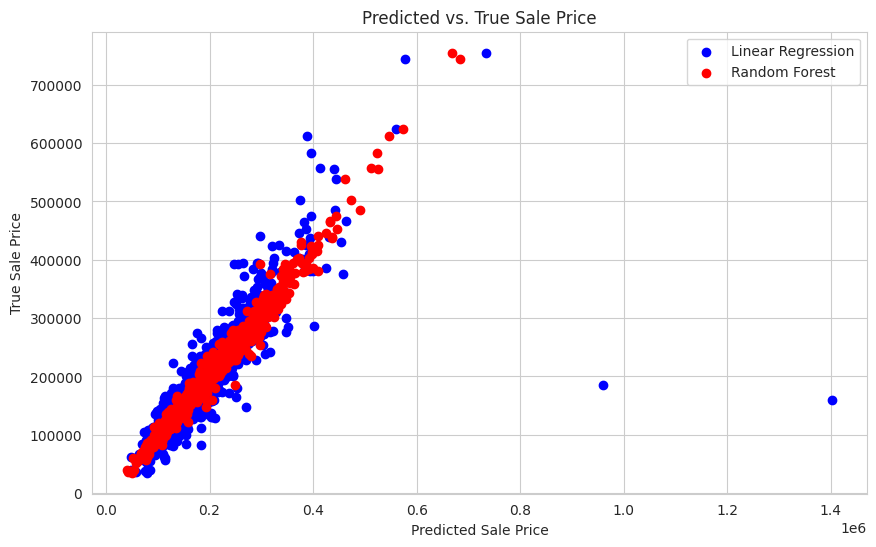

In [120]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions_lr, train_df['SalePrice'], color='blue', label='Linear Regression')
plt.scatter(predictions_rf, train_df['SalePrice'], color='red', label='Random Forest')
plt.xlabel('Predicted Sale Price')
plt.ylabel('True Sale Price')
plt.title('Predicted vs. True Sale Price')
plt.legend()
plt.show()


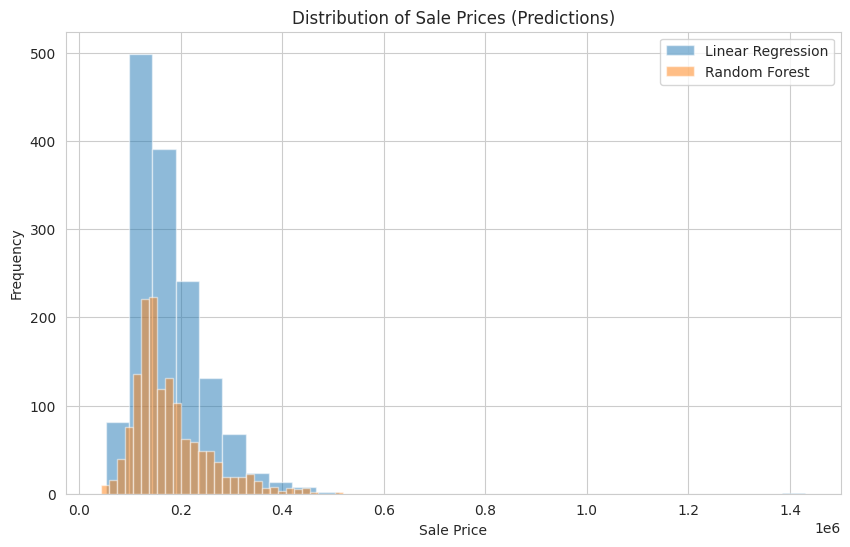

In [121]:
#histogram
import pandas as pd

# Load the submission files
submission_linear = pd.read_csv("submission_linear.csv")
submission_forest = pd.read_csv("submission_forest.csv")

# Plot the SalePrice distributions from both submissions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(submission_linear['SalePrice'], bins=30, alpha=0.5, label='Linear Regression')
plt.hist(submission_forest['SalePrice'], bins=30, alpha=0.5, label='Random Forest')
plt.title('Distribution of Sale Prices (Predictions)')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


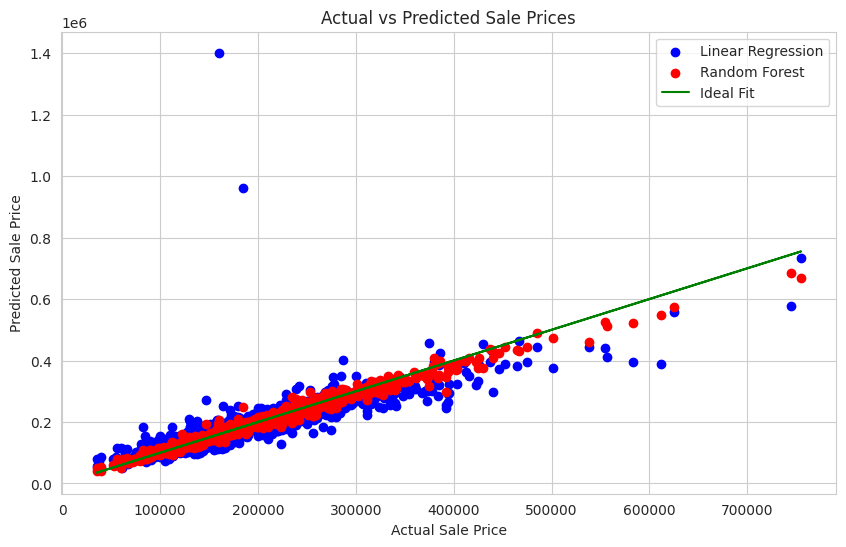

In [122]:
#scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted sale prices for Linear Regression
plt.scatter(train_df['SalePrice'], predictions_lr, color='blue', label='Linear Regression')

# Scatter plot of actual vs predicted sale prices for Random Forest
plt.scatter(train_df['SalePrice'], predictions_rf, color='red', label='Random Forest')

# Plotting the regression line for Linear Regression
plt.plot(train_df['SalePrice'], train_df['SalePrice'], color='green', label='Ideal Fit')

plt.title('Actual vs Predicted Sale Prices')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid(True)
plt.show()


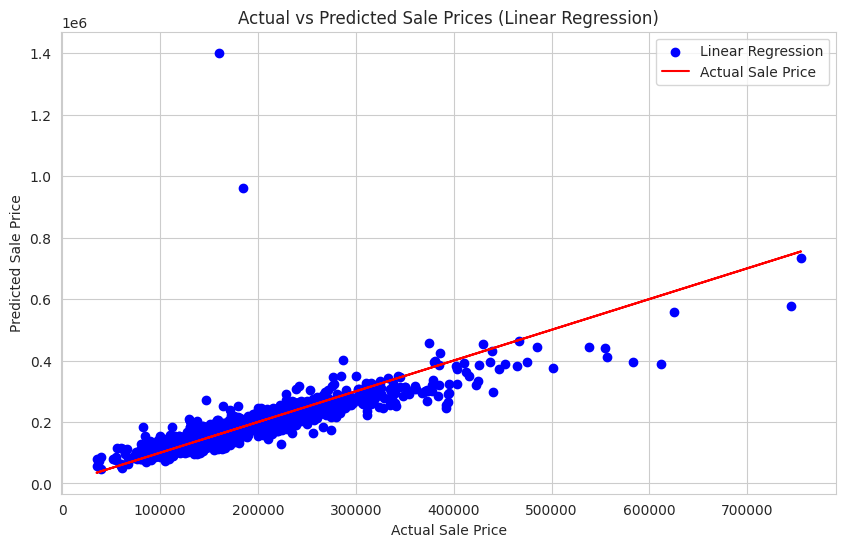

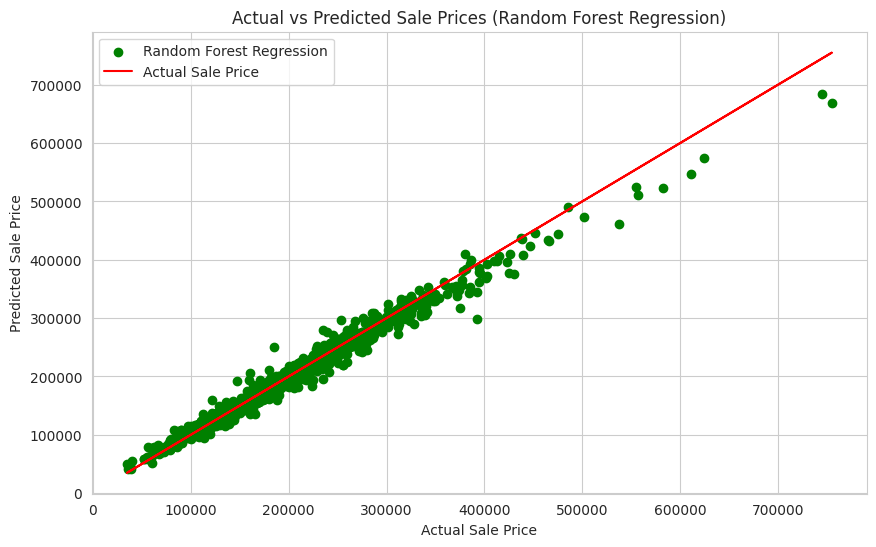

In [123]:
#scatter plot
# Plot regression line for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(train_df['SalePrice'], predictions_lr, color='blue', label='Linear Regression')
plt.plot(train_df['SalePrice'], train_df['SalePrice'], color='red', label='Actual Sale Price')
plt.title('Actual vs Predicted Sale Prices (Linear Regression)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()

# Plot regression line for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(train_df['SalePrice'], predictions_rf, color='green', label='Random Forest Regression')
plt.plot(train_df['SalePrice'], train_df['SalePrice'], color='red', label='Actual Sale Price')
plt.title('Actual vs Predicted Sale Prices (Random Forest Regression)')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()
